## import necessary Libraries


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.stats import chi2
import warnings
import os as os


# Load data from file into array


In [91]:
# variables containing string of filepaths
filepath_data='S095/S095R.txt'
filepath_blank='S095/BLANK.txt'
filepath_std='S095/STD.txt'
#load in all necessary data, since background and noise data is needed
data_in = np.genfromtxt(filepath_data, skip_header=6, delimiter='	')
blankARraw = np.genfromtxt(filepath_blank, skip_header = 6, delimiter = '	')
#blankBRraw = np.genfromtxt('BLANK_BR.txt', skip_header = 6, delimiter = '	')
std_corrARraw = np.genfromtxt(filepath_std, skip_header = 6, delimiter = '	')
#std_corrBRraw = np.genfromtxt('S011/std1.txt', skip_header = 6, delimiter = '	')

## two of the load statements are commented out since not all files contain them, and I'm unsure how to include them
## maybe by averaging them in aswell

In [92]:
#enter columns into 1d arrays
wavel = data_in[:,1][800:3000] ##wavel contains x values
image1 = data_in[:,-1][800:3000]
image2 = data_in[:,-2][800:3000]
image3 = data_in[:,-3][800:3000]
image4 = data_in[:,-4][800:3000]
image5 = data_in[:,-5][800:3000]
blankAR1 = blankARraw[:,-1][800:3000]
blankAR2 = blankARraw[:,-2][800:3000]
blankAR3 = blankARraw[:,-3][800:3000]
blankAR4 = blankARraw[:,-4][800:3000]
blankAR5 = blankARraw[:,-5][800:3000]
std_corrAR1 = std_corrARraw[:,-1][800:3000]
std_corrAR2 = std_corrARraw[:,-2][800:3000]
std_corrAR3 = std_corrARraw[:,-3][800:3000]
std_corrAR4 = std_corrARraw[:,-4][800:3000]
std_corrAR5 = std_corrARraw[:,-5][800:3000]

##average over 5 spectra
image = np.mean([image1,image2,image3,image4,image5],axis = 0) ## y values


blankAR = np.mean([blankAR1,blankAR2,blankAR3,blankAR4,blankAR5],axis = 0) ## to be subtracted
std_corrAR = np.mean([std_corrAR1,std_corrAR2,std_corrAR3,std_corrAR4,std_corrAR5],axis = 0) - blankAR ## to be divided


# Subtract background and divide reflectivity


In [93]:
#this should take the data at the edges to zero
nobackground = image - blankAR


##this is now data with no background, and with the empty sapphire substrate divided out
final = np.divide(nobackground,std_corrAR, out = np.zeros_like(nobackground), where = std_corrAR != 0)

## Plot raw data (before correction) with a solid line


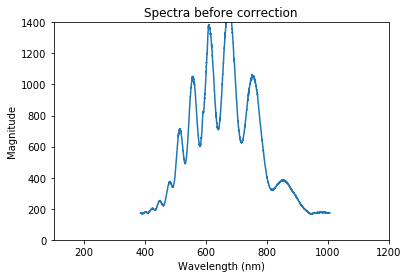

In [94]:
plt.plot(wavel,image, '-');

# Set axis limits
plt.xlim(100,1200)
plt.ylim(0,1400);

# Add axis labels
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude');


# Add title
plt.title('Spectra before correction');

# Plot cleaned data with a solid line


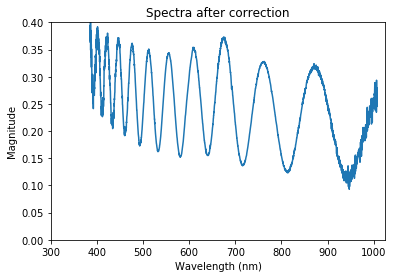

In [95]:
plt.plot(wavel,final, '-');

# Set axis limits 
plt.xlim(300,1025)
plt.ylim(0,.4);

# Add axis labels
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude');

# Add legend
## plt.legend(['Data','100 $\Omega$'])

# Add title
plt.title('Spectra after correction');

## Declare model fitting function and plot initial parameters


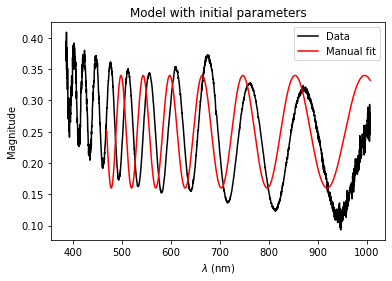

In [98]:
## x needs to be first parameter!!!
def model(x,a,b,d):
    n = 2.39*4*np.pi    
    return a+(b * np.cos(d*(n/x)))
## a and b are constants, d is thickness, x is wavelength, n is refractive index of material (2.39?)

## set initial param. values below based on existing data 2018-2019

ainit = .25
binit =.09
dinit = 1250
## index depends on material (2.39 used in existing data 2018-2019)
pinit = [ainit,binit,dinit]
## plot model with inital parameters
plt.plot(wavel,final, 'k-', label = 'Data');
plt.plot(wavel[300:], model(wavel[300:],pinit[0],pinit[1],pinit[2]), 'r-', label = 'Manual fit');

# Label axes and give it a title for notebook (remove it when including the plot in a report)
plt.xlabel('$\\lambda$ (nm)')
plt.ylabel('Magnitude')
plt.title('Model with initial parameters')
plt.legend()
plt.show()


## Perform fit and plot over data

a =  0.23821516729436726 +/- 0.0007102736894795744
b =  0.0945081476956869 +/- 0.001011937049771213
Thickness =  1279.399105961911 +/- 0.2424094182534287 nm


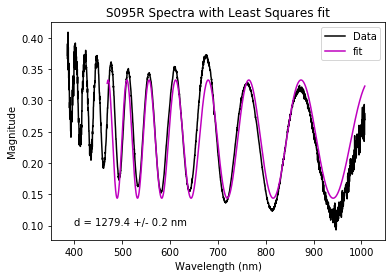

In [100]:
pOpt, pVar = curve_fit(model,wavel[300:],final[300:], p0 = pinit)
pErr = np.sqrt(np.diag(pVar))
print ("a = ", pOpt[0], '+/-', pErr[0])
print ("b = ", pOpt[1], '+/-', pErr[1])
print ("Thickness = ", pOpt[2], '+/-', pErr[2], "nm")

## plot manual fit on top of data
fit = model(wavel[300:],pOpt[0],pOpt[1],pOpt[2]) ## need to remember it has as many points as final[300:]
plt.plot(wavel,final, 'k-', label = 'Data');

plt.plot(wavel[300:], fit, 'm-', label = 'fit');


# Set axis limits to include origin
plt.xlim(350,1050)


# Add axis labels
plt.xlabel('Wavelength (nm)')
plt.ylabel('Magnitude');

# Add legend
plt.legend()

# Add title
plt.title('S095R Spectra with Least Squares fit');
plt.text(400,.1,'d = 1279.4 +/- 0.2 nm')
plt.savefig('S095/fit95R.pdf')


## Compute Residuals and plot


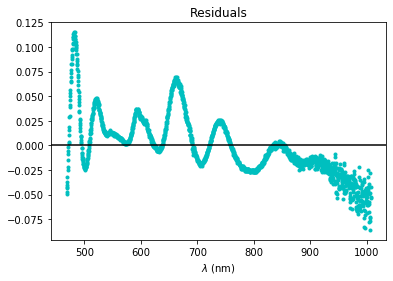

In [101]:
residuals = final[300:] - fit

plt.plot(wavel[300:], residuals, 'c.')
plt.title('Residuals')
plt.xlabel('$\lambda$ (nm)')
plt.axhline(y=0.0, color='k', linestyle='-')
plt.show()
##not sure these apply here, fit was non linear least squares

## Compute Coefficient of Determination

In [102]:
res_sum_sq = np.sum(residuals**2)
tot_sum_sq = np.sum((final[300:] - np.mean(final[300:]))**2)

r_sq = 1 - (res_sum_sq/tot_sum_sq)

print(r_sq)

0.8213666926118397
